#Projeto COVID-19
##Digital Innovation One

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#Importar dados do GitHub
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

In [3]:
#Criando DataFrame
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])

In [ ]:
#Verificando tipos de dados
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [4]:
#Função para corrigir nomes com regex
import re

def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [5]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [6]:
#Verificar casos por país
df.countryregion.value_counts()

US                     4990
Mainland China         3687
Canada                 1093
Australia               788
France                  752
                       ... 
North Ireland             1
Channel Islands           1
Cape Verde                1
Republic of Ireland       1
East Timor                1
Name: countryregion, Length: 223, dtype: int64

In [7]:
#Verificar todos os paises
df.countryregion.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [8]:
#Filtrar dados do Brasil
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [9]:
brasil = df.loc[
    (df.countryregion == 'Brazil') &
    (df.confirmed > 0)]
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


##Casos confirmados no Brasil

In [10]:
# Gráfico da evolução de casos confirmados no brasil
px.line(brasil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')

##Aumento de casos por dia

In [11]:
#Programação funcional, função lambda
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))


<ipython-input-11-9b69a7f0830f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
px.line(brasil, 'observationdate', 'novoscasos', title='Novos casos por dia confirmados no Brasil')

##Mortes no Brasil

In [13]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
               mode='lines+markers', line={'color':'red'})
)

#Layout
fig.update_layout(title='Mortes por COVID-19 no Brasil')
fig.show()

##Taxa de crescimento de mortes
####A taxa_crescimento = (presente/passado)**(1/n)-1

In [14]:
#Se a data inicio for None, define como a primeira data disponível
def taxa_crescimento(base, variavel, data_inicio=None, data_fim=None):
  if data_inicio == None:
    data_inicio = base.observationdate.loc[base[variavel] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)

  if data_fim == None:
    data_fim = base.observationdate.iloc[-1]
  else:
    data_fim = pd.to_datetime(data_fim)

  #Define os valore do presente e passado
  passado = base.loc[base.observationdate == data_inicio, variavel].values[0]
  presente = base.loc[base.observationdate == data_fim, variavel].values[0]

  #Define o número de pontos no tempo que vamos avaliar
  n = (data_fim - data_inicio).days

  #Caucular a taxa
  taxa = (presente / passado)**(1/n)-1

  return taxa*100

In [15]:
#Taxa de crescimento médio do COVID no Brasil em todo o período
taxa_crescimento(brasil, 'confirmed')

16.27183353112116

##Taxa de crescimento diário do COVID-19 no Brasil

In [16]:
def taxa_crescimento_diaria(base, variavel, data_inicio=None):
  if data_inicio == None:
    data_inicio = base.observationdate.loc[base[variavel] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)

  data_fim = base.observationdate.max()

  #Define o número de pontos no tempo que vamos avaliar
  n = (data_fim - data_inicio).days

  #Taxa calculada de um dia para o outro
  taxas = list(map(
      lambda x: (base[variavel].iloc[x] - base[variavel].iloc[x-1]) / base[variavel].iloc[x-1],
      range(1, n+1)
  ))
  return np.array(taxas) * 100

In [17]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [18]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

##Predições

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [20]:
#Novo DataFrame de casos confirmados por dia
casos_confirmados = brasil.confirmed
casos_confirmados.index = brasil.observationdate
casos_confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [21]:
resultado = seasonal_decompose(casos_confirmados)

<function matplotlib.pyplot.show(close=None, block=None)>

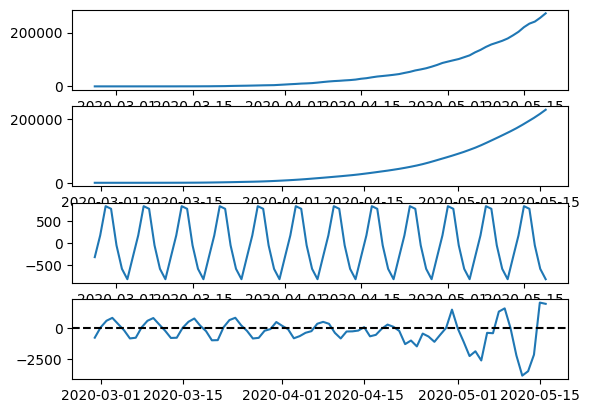

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

ax1.plot(resultado.observed)
ax2.plot(resultado.trend)
ax3.plot(resultado.seasonal)
ax4.plot(casos_confirmados.index, resultado.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show

##Modelo ARIMA (Média móvel integrada autoregressiva)
##Tenta modelar o futuro em função do passado

In [ ]:
#instalando o pacote ARIMA
! pip install pmdarima

In [25]:
from pmdarima.arima import auto_arima
modelo = auto_arima(casos_confirmados)

In [26]:
fig = go.Figure(go.Scatter(
    x=casos_confirmados.index, y=casos_confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=casos_confirmados.index, y=modelo.predict_in_sample(), name='Predição'
))
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))
fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()